In [1]:
import sys

sys.path.append("..")

In [2]:
from io import BytesIO

import requests
from PIL import Image

from colorpalettes.from_image import k_means_palette
from colorpalettes.optimize import ColorsetOptimizationConfig, optimize_colorset

In [3]:
resp = requests.get("https://upload.wikimedia.org/wikipedia/en/2/27/Bliss_%28Windows_XP%29.png")

In [4]:
resp.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x00\xf1\x08\x02\x00\x00\x00\xfe\xc8\x1dg\x00\x00\x01\x15iCCPICC profile\x00\x00(\x91c``\x92qtqre\x12``\xc8\xcd+)\nrwR\x88\x88\x8cR`\xbf\xc8\xc0\x01\x86\xb2\x0c&\x89\xc9\xc5\x05\x8e\x01\x01>\x0c@\x90\x97\x9f\x97\xca\x80\x01\xbe]c`\x04\xd1\x97uAfa\xca\xe3\x05\\\xc9\x05E%@\xfa\x0f\x10\xab\xa4\xa4\x16\'300*\x00\xd9i\xe5%\x05@q\xc6\x0e [$)\x1b\xcc\x9e\x03b\x17\x85\x049\x03\xd9\x1b\x80l\xbet\x08\xfb\x00\x88\x9d\x04a_\x00\xb1\x8b\x80\x9e\x00\xb2\x1f\x80\xd4\xa7C\xd8_\xc0\xe6\x80\xd9L\x1c vIj\x05\xc8^\x06\x8ddM\x05#\x03\x03C\x05\xc7\x94\xfc\xa4T\x85\xe0\xca\xe2\x92\xd4\xdcb\x05\xcf\xbcd=\x06\x88{\xc0\x80\xdb9\xbf()\xb3X\x01\x18D$\xfa\x90\x08\x00\ns\x08\xebs 8,\x19\xc5\xce \xc4\x10 \xb9\xb4\xa8\x0c\xcadd<K\x98\x8f0\xa3\x88\x8f\x81\xc1\xd4\x8d\x81\x81=\x05!\x96\xd8\xc6\xc0\xb0\xfb\x14\x03\x83\xf4e\x84\x982\xd0w|\x1f\x18\x18\xd6\x7f\x03\x00^\x97K\xc6\x81:#U\x00\x01\xab\xc7IDAT\x18\x19\x04\xc1\xc9\xcfm\xe9\x99\xe6\xe5\xdf\xfd\xbc\xefZk\xef

In [5]:
image = Image.open(BytesIO(resp.content))

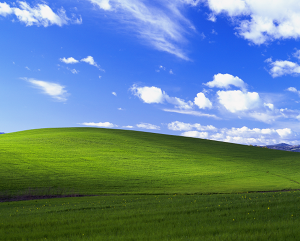

In [6]:
image

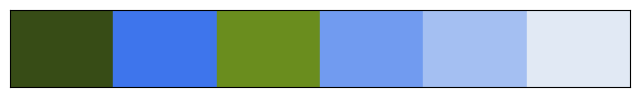

In [7]:
palette = k_means_palette(image, n_colors=6)

palette = palette.sorted_by_lightness()
palette.plot_colors();

/Users/njvh/Documents/Personal/colorpalettes/venv/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:686: RuntimeWarning: invalid value encountered in subtract
  df = [f_eval - f0 for f_eval in f_evals]


  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 1927.0551019852087
        x: [ 2.103e+01  3.343e+01 ...  1.334e+01  2.409e+02]
      nit: 14
      jac: [ 5.100e-01  1.326e-02 ...  7.348e+01  1.140e+01]
     nfev: 304
     njev: 16
 hess_inv: <18x18 LbfgsInvHessProduct with dtype=float64>
D = 41.24 +/- 15.39; median = 47.51; worst = 14.91


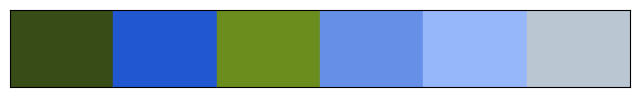

In [11]:
optimized = optimize_colorset(
    palette,
    config=ColorsetOptimizationConfig(
        # chroma_valley=(70, 10),
        # lightness_valley=(70, 10),
        # global_constraints_weight=1,
        verbose=True,
    ),
)
optimized.print_distance_stats()
optimized.plot_colors();

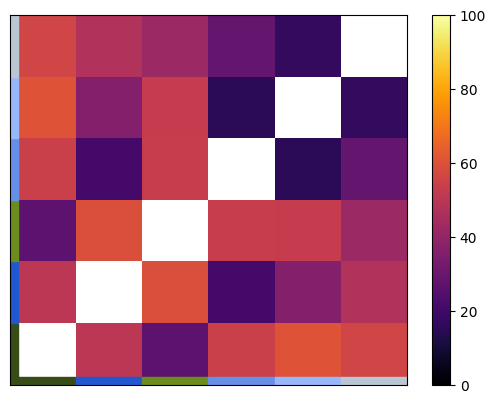

In [13]:
optimized.plot_distances();